# **KAU Deep Learning (Spring 2025)**
### Machine Learning Basics I with Scikit-Learn

**NOTE**
Some descriptions & codes from the below resources:
1. Introducing Scikit-Learn Tutorials (https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
2. https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=5Yi3ZipnnSKk
3. https://colab.research.google.com/github/rugantio/MachineLearningCourse/blob/master/class06_Scikit-Learn.ipynb#scrollTo=UDr40yi2EIx5
4. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition (https://github.com/ageron/handson-ml2)
5. https://colab.research.google.com/github/diannekrouse/LRPython/blob/master/LogisticRegression.ipynb
6. https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

----


# Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward..

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
print (sklearn.__version__)
assert sklearn.__version__ >= "0.20"

1.6.1


## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.


A classification algorithm, for example, expects the data to be represented as a **feature matrix** and a **label vector**:

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.

scikit-learn comes with a few standard datasets.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.

#### The Iris Dataset
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html


Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

  * sepal:꽃받침, petal: 꽃잎

- Target classes to predict:

  1. Iris Setosa (세토사)
  2. Iris Versicolour (버시컬러)
  3. Iris Virginica (버지니카)
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

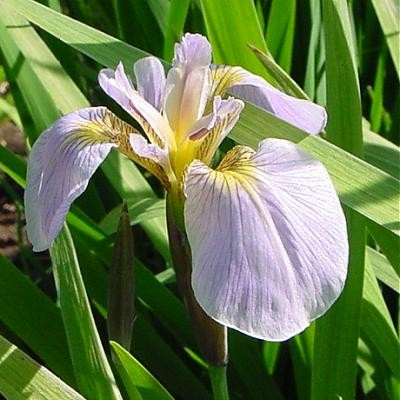

Iris Setosa



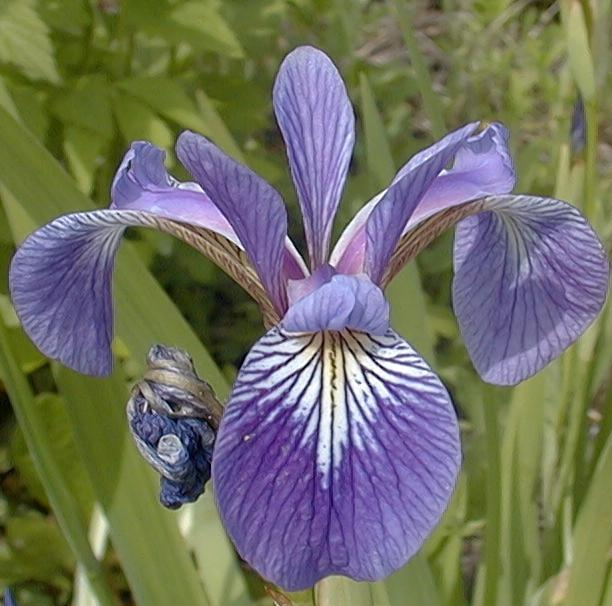

Iris Versicolor



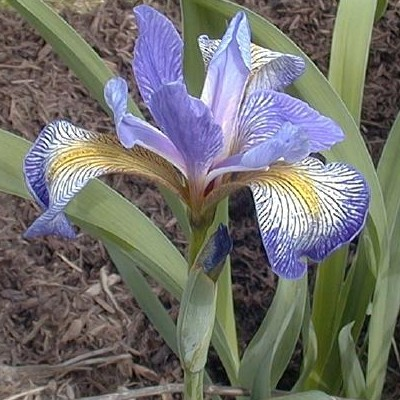

Iris Virginica


In [ ]:
from IPython.core.display import Image, display
display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-setosa-10_1.jpg', width=200, height=200))
print ("Iris Setosa\n")

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-versicolor-21_1.jpg', width=200, height=200))
print ("Iris Versicolor\n")

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg', width=200, height=200))
print ("Iris Virginica")

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
n_samples, n_features = iris.data.shape # q50개 샘플 / 특징 4가지
print (n_samples, n_features)

for n in range(0,10) :
  print (iris.data[n]) # (sepal length, sepal weidth, petal length, petal width)


150 4
[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]
[4.9 3.1 1.5 0.1]


In [ ]:
print (iris.target) # 0 : setosa, 1 : versicolor, 2 : virginica
print (len(iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


In [ ]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


#### Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks!


In [ ]:
import pandas as pd
import numpy as np

dataset = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target']).astype('float32')
dataset.head() # 판다스 데이터 출력 명령어

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


This data is four dimensional, but we can visualize two of the dimensions at a time using a simple scatter-plot:

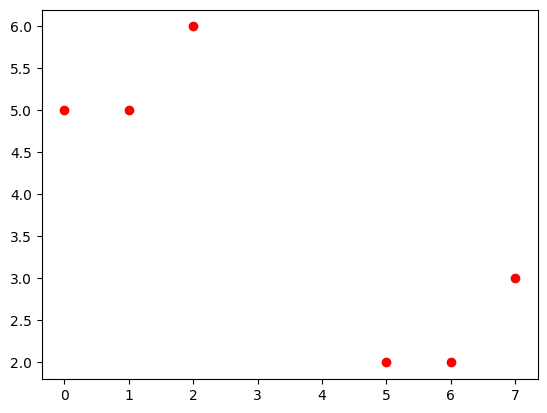

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,5,2,6,7])
y = np.array([5,5,2,6,2,3])

#plt.plot(x,y,'.')
plt.scatter(x, y, color='r') # x,y축의 사이즈를 맞춰서 점을 찍어준다

(150, 4)
(150,)


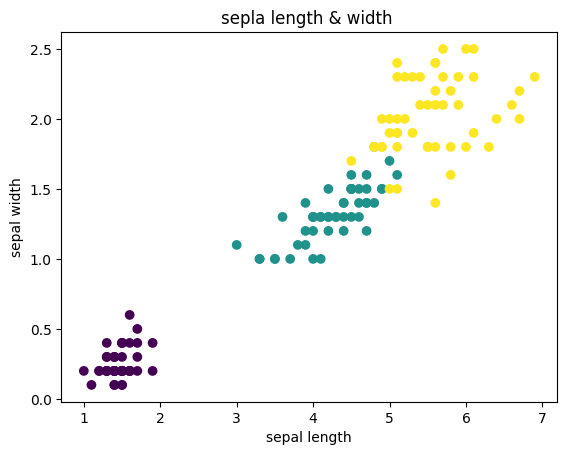

In [ ]:
# data index
# idx 0, sepal length in cm
# idx 1, sepal width in cm
# idx 2, petal length in cm
# idx 3, petal width in cm

####### YOUR CODE HERE #######
# Data scattering
print(iris.data.shape)
print(iris.data[:,0].shape)
plt.title('sepla length & width ')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

x=iris.data[:,0]
y=iris.data[:,1]
z=iris.data[:,2]
w=iris.data[:,3]

plt.scatter(iris.data[:,2],iris.data[:,3],c=iris.target) # x,y축의 사이즈를 맞춰서 점을 찍어준다

## Other Available Data
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

In [ ]:
from sklearn import datasets

sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)[source]

In [ ]:
# generate a random n-class classification problem
datasets.make_classification()

(array([[-7.07589911e-01,  1.76252058e-01, -2.54172649e-01, ...,
         -1.20386100e+00,  1.01689027e+00, -1.20495731e+00],
        [-8.37905434e-01,  6.04253484e-01, -3.13430734e-01, ...,
          6.39551625e-01, -9.46534633e-02,  2.06906042e-02],
        [ 5.64365039e-01, -9.95332232e-01,  1.62662735e-01, ...,
          5.20850102e-01, -2.53980038e-01, -1.15123735e+00],
        ...,
        [-1.97031784e-01,  9.53711264e-01, -8.43680372e-02, ...,
         -3.75452281e-01, -1.11617328e+00,  6.56618846e-01],
        [ 2.93656615e-01,  2.01606332e-01,  8.54132383e-02, ...,
          1.94275070e+00,  1.51901661e+00, -8.39918869e-04],
        [-6.36056267e-01,  1.03483685e+00, -2.42993556e-01, ...,
          6.44675340e-01,  1.32241703e-02, -2.65143646e+00]]),
 array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()


sns.pairplot(iris, hue='species', height=1.5)

TypeError: 'data' must be pandas DataFrame object, not: <class 'sklearn.utils._bunch.Bunch'>

To summarize, the expected layout of features and target values is visualized in the following diagram

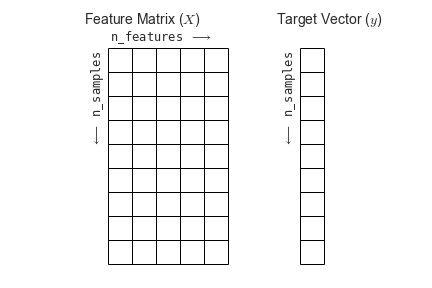

### The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [ ]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit(training) the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Linear regression using the Normal Equation with Numpy (without Scikit-Learn estimator)

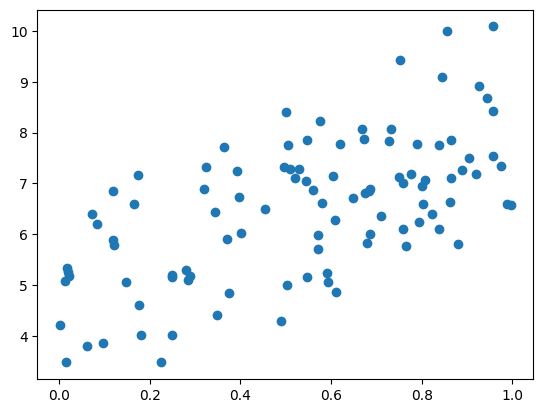

(100, 1)
(100, 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

####### YOUR CODE HERE #######
# Let's make a NxD uniform (0,1) random vector X (N=100, D=1)  : X = Nx1 vector
x_data = np.random.rand(100,1)
w=3
b=5
N=np.random.randn(100,1) # 가우시안 노이즈
# Then, add Gaussian random vector with Y = wX + b
y = w * x_data + b + N

plt.scatter(x_data,y)
plt.show()

print(x_data.shape)
print(y.shape)

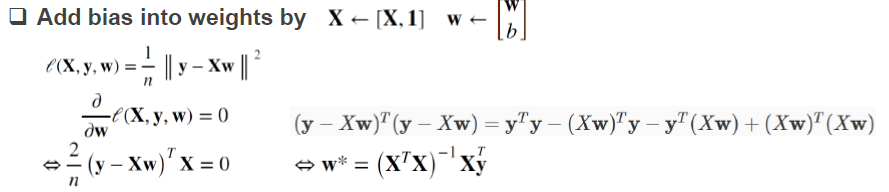

In [ ]:
# Vector concatenation example
a = np.array([1,2,3])
b = np.array([4,5,6])

c = np.c_[a, b]
print(c)

d = np.concatenate([a.reshape(3,1),b.reshape(3,1)], axis=1)
print(d)

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


shape of w_star:  (2, 1)
value of w_star
 [[2.99880851]
 [4.88190231]]
x0: 0.0020855524020476635
x1: 0.9965524556845324


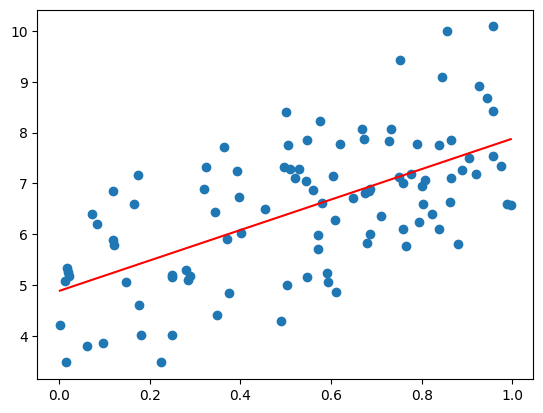

In [ ]:
####### YOUR CODE HERE #######
# Estimation of Lienar regression parameters (w, b)
one_arr=np.ones((100,1))
new_x_data = np.c_[x_data, one_arr] # 100x2

w_star = np.linalg.inv(new_x_data.T @ new_x_data) @ new_x_data.T @ y
print('shape of w_star: ',w_star.shape) # 2x1
print('value of w_star\n',w_star)
# w[0,0] : 기울기 , w[0,1] : 절편
# Draw the scatter plot and its estimation
x0 = np.min(x_data)
x1 = np.max(x_data)
print('x0:', x0)
print('x1:', x1)

y0=w_star[0,0] * x0 + w_star[1,0] # x가 x0일 때의 y값
y1=w_star[0,0] * x1 + w_star[1,0] # x가 x1일 때의 y값

plt.scatter(x_data,y)
plt.plot((x0,x1),(y0,y1),color='red')

shape of w_star:  (2, 1)
value of w_star
 [[2.4530428]
 [5.430953 ]]
x0: 0.013431980127701304
x1: 0.9970964488562883
Linear Regression error:  1.0441886862148138


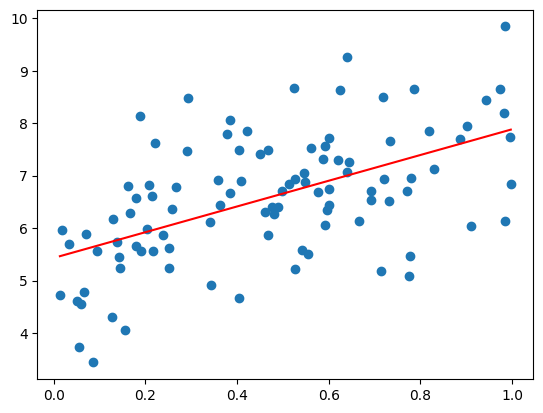

In [ ]:
#교수님 질문 코드
####### YOUR CODE HERE #######
# Let's make a NxD uniform (0,1) random vector X (N=100, D=1)  : X = Nx1 vector
x_data = np.random.rand(100,1)
w=3
b=5
N=np.random.randn(100,1) # 가우시안 노이즈
# Then, add Gaussian random vector with Y = wX + b
y = w * x_data + b + N

# Estimation of Lienar regression parameters (w, b)
one_arr=np.ones((100,1))
new_x_data = np.c_[x_data, one_arr] # 100x2

w_star = np.linalg.inv(new_x_data.T @ new_x_data) @ new_x_data.T @ y
print('shape of w_star: ',w_star.shape) # 2x1
print('value of w_star\n',w_star)
# w[0,0] : 기울기 , w[0,1] : 절편
# Draw the scatter plot and its estimation
x0 = np.min(x_data)
x1 = np.max(x_data)
print('x0:', x0)
print('x1:', x1)

y0=w_star[0,0] * x0 + w_star[1,0] # x가 x0일 때의 y값
y1=w_star[0,0] * x1 + w_star[1,0] # x가 x1일 때의 y값

plt.scatter(x_data,y)
plt.plot((x0,x1),(y0,y1),color='red')

# estimation error
linear_regression_error = np.mean(((new_x_data @ w_star) - y)**2)
print('Linear Regression error: ', linear_regression_error)

## Performing Linear Regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X = x_data
lin_reg.fit(X, y)

#Here
# lin_reg.intercept_ => 'bias'
# lin_reg.coef_ => weights
print( lin_reg.intercept_, lin_reg.coef_ )

[5.430953] [[2.4530428]]


### Logistic Regression Classifier in Python - Basic Introduction

In logistic regression... basically, you are performing linear regression but applying a sigmoid function for the outcome.

#### Sigmoid  / Logistic Function

$\hat y =1 / 1 + e^{-z}$

#### Properties of Logistic Regression

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)

#### Advantages
* Straight forward, easy to implement, doesn't require high compute power, easy to interpret, used widely.
* Doesn't require feature scaling and provides a probability score for observations.

#### Disadvantages
* Not able to handle a large number of category features/variables.
* Vulnerable to overfitting.

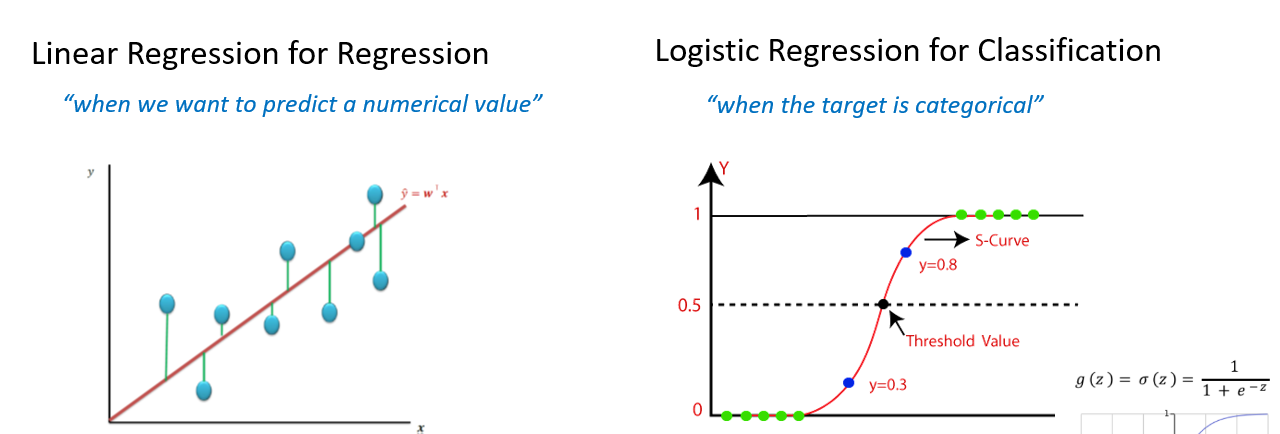

### Logistic Regression 3-class Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()

In [ ]:
# Split data into train test sets
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target

# stratify => to make balanced bins
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y)

print(y_train.shape) # 150 * 0.7
print(y_test.shape) # 150 * 0.3
print('y label count:', np.bincount(y))
print('y_train label count:', np.bincount(y_train))
print('y_test label count:', np.bincount(y_test))

(105,)
(45,)
y label count: [50 50 50]
y_train label count: [35 35 35]
y_test label count: [15 15 15]


### Standardization

**Standardization** of datasets is a **common requirement for many machine learning estimators** implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with **zero mean and unit variance**.

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
sc.fit(X_train)  # Compute mean and var
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

# start training
# model is learning the relationship between digits (x_train) and labels (y_train)
logisticRegr.fit(X_train_std, y_train)

LogisticRegression()

Make predictions on entire test data

In [ ]:
predictions = logisticRegr.predict(X_test_std)
print(predictions)

[2 1 2 0 2 2 2 1 2 0 0 2 1 0 0 1 0 1 2 1 1 1 0 1 1 2 2 1 1 1 2 0 0 1 0 0 1
 2 0 0 0 2 1 2 0]


Check out the performance of our trained model

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test_std, y_test)
print(score)

0.9777777777777777


### Confusion Matrix (혼동행렬)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


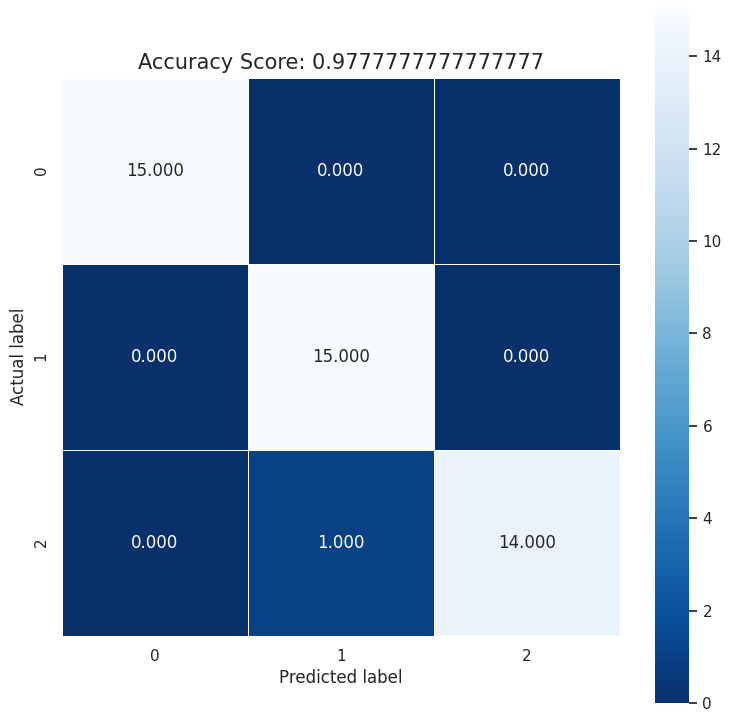

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# Checkout the predictions of our model given some samples from the test set

print ("The model's predictions: ", logisticRegr.predict_proba(X_test_std[:5, :]).argmax(axis=1))
print ("GT Labels ", y_test[:5])

The model's predictions:  [2 1 2 0 2]
GT Labels  [2 1 2 0 2]
